In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[6]

'frog'

In [9]:
def plt_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

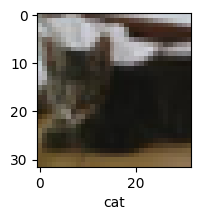

In [10]:
plt_sample(x_train,y_train,9)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

C:\Users\swath\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [17]:
cnn.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8969 - loss: 0.2855
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9061 - loss: 0.2678
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9090 - loss: 0.2546
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9143 - loss: 0.2375
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9193 - loss: 0.2259
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.9266 - loss: 0.2062
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9232 - loss: 0.2088
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9329 - loss: 0.1899
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9358 - loss: 0.1817
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9388 - loss: 0.1712
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9444 - loss: 0.1573
Epoch 12

In [18]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6629 - loss: 3.0265


[3.00130558013916, 0.6618000268936157]

In [20]:
# Save the trained model as an HDF5 file
cnn.save('cnn_cifar10_model.h5')


In [21]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

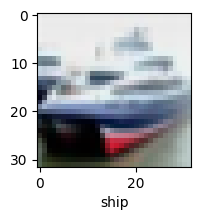

In [22]:
plt_sample(x_test,y_test,1)

In [23]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


array([[4.6214849e-02, 1.3870229e-08, 9.7944063e-01, 1.0000000e+00,
        1.1706159e-05, 9.9999774e-01, 9.9392885e-01, 2.8881117e-10,
        5.8354471e-14, 1.4931672e-12],
       [7.2883311e-05, 1.0000000e+00, 3.9481876e-23, 8.4824368e-13,
        2.0392366e-20, 1.4476279e-23, 9.1173198e-20, 8.6558939e-13,
        1.0000000e+00, 1.0000000e+00],
       [2.2948374e-01, 9.9999970e-01, 8.6220625e-06, 6.3834421e-02,
        1.9065927e-10, 7.4083832e-06, 1.2745451e-04, 2.4691178e-01,
        7.3503770e-02, 9.4035357e-01],
       [1.0000000e+00, 9.1479014e-04, 2.3849105e-07, 2.1635955e-04,
        2.4505620e-04, 2.1027844e-17, 1.8825466e-08, 5.3694305e-10,
        9.1734415e-01, 5.6014898e-10],
       [5.8795642e-11, 6.2018378e-05, 9.6067768e-01, 9.9554169e-01,
        1.0000000e+00, 9.9616766e-01, 9.6053934e-01, 2.7244343e-10,
        1.8255183e-07, 8.5345505e-16]], dtype=float32)

In [24]:
y_classes=[np.argmax(element) fro element in y_pred]
y_classes[:5]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4227926568.py, line 1)

In [ ]:
y_test[:5]